In [1]:
import numpy as np

In [2]:
def padding_sequence(seq, max_len = 501, repkey = 'N'):
    seq_len = len(seq)
    if seq_len < max_len:
        gap_len = max_len -seq_len
        new_seq = seq + repkey * gap_len
    else:
        new_seq = seq[:max_len]
    return new_seq

In [3]:
def get_RNA_seq_concolutional_array(seq, motif_len = 4):
    seq = seq.replace('U', 'T')
    alpha = 'ACGT'
    #for seq in seqs:
    #for key, seq in seqs.iteritems():
    row = (len(seq) + 2*motif_len - 2)
    new_array = np.zeros((row, 4))
    for i in range(motif_len-1):
        new_array[i] = np.array([0.25]*4)
    
    for i in range(row-3, row):
        new_array[i] = np.array([0.25]*4)
        
    #pdb.set_trace()
    for i, val in enumerate(seq):
        i = i + motif_len-1
        if val not in 'ACGT':
            new_array[i] = np.array([0.25]*4)
            continue
        #if val == 'N' or i < motif_len or i > len(seq) - motif_len:
        #    new_array[i] = np.array([0.25]*4)
        #else:
        try:
            index = alpha.index(val)
            new_array[i][index] = 1
        except:
            pdb.set_trace()
        #data[key] = new_array
    return new_array

In [4]:
def get_bag_data_1_channel(data, max_len = 501):
    bags = []
    seqs = data["seq"]
    labels = data["Y"]
    for seq in seqs:
        #pdb.set_trace()
        #bag_seqs = split_overlap_seq(seq)
        bag_seq = padding_sequence(seq, max_len = max_len)
        #flat_array = []
        bag_subt = []
        #for bag_seq in bag_seqs:
        tri_fea = get_RNA_seq_concolutional_array(bag_seq)
        bag_subt.append(tri_fea.T)

        
        bags.append(np.array(bag_subt))
    
        
    return bags, labels

In [5]:
def read_seq_graphprot(seq_file, label = 1):
    seq_list = []
    labels = []
    seq = ''
    with open(seq_file, 'r') as fp:
        for line in fp:
            if line[0] == '>':
                name = line[1:-1]
            else:
                seq = line[:-1].upper()
                seq = seq.replace('T', 'U')
                seq_list.append(seq)
                labels.append(label)
    
    return seq_list, labels

In [6]:
def read_data_file(posifile, negafile = None, train = True):
    data = dict()
    seqs, labels = read_seq_graphprot(posifile, label = 1)
    if negafile:
        seqs2, labels2 = read_seq_graphprot(negafile, label = 0)
        seqs = seqs + seqs2
        labels = labels + labels2
        
    data["seq"] = seqs
    data["Y"] = np.array(labels)
    
    return data

In [7]:
def get_data(posi, nega = None, channel = 7,  window_size = 101, train = True):
    data = read_data_file(posi, nega, train = train)
    if channel == 1:
        train_bags, label = get_bag_data_1_channel(data, max_len = window_size)

    else:
        train_bags, label = get_bag_data(data, channel = channel, window_size = window_size)
    
    return train_bags, label

In [8]:
f, l = get_data('./CLIPSEQ_AGO2.train.positives.fa', './CLIPSEQ_AGO2.train.negatives.fa', channel=1)

In [9]:
f_test, l_test = get_data('./CLIPSEQ_AGO2.ls.positives.fa','CLIPSEQ_AGO2.ls.negatives.fa', channel=1, train=False)

In [10]:
f = np.array(f)
f = np.swapaxes(f, -1, 1)

In [11]:
f_test = np.array(f_test)
f_test = np.swapaxes(f_test, -1, 1)


In [12]:
# Print the shape of the training data
print("Training Data Shape:", f.shape)  # Output: (number of sequences, max_len, 4)
print("Training Labels Shape:", l.shape)  # Output: (number of sequences)

# Print the shape of the testing data
print("Testing Data Shape:", f_test.shape)  # Output: (number of sequences, max_len, 4)
print("Testing Labels Shape:", l_test.shape)  # Output: (number of sequences)

# Print the first training sequence (example)
print("\nExample Training Sequence (first sequence):")
print(f[0])  # This will print a 2D array of shape (max_len, 4), representing the encoded sequence 

# Visualizing the data (example)
print("\nExample of the first sequence encoded as an array:")
for i in range(10):  # Print the first 10 rows of the array
    print(f[0][i])

Training Data Shape: (92346, 107, 4, 1)
Training Labels Shape: (92346,)
Testing Data Shape: (1000, 107, 4, 1)
Testing Labels Shape: (1000,)

Example Training Sequence (first sequence):
[[[0.25]
  [0.25]
  [0.25]
  [0.25]]

 [[0.25]
  [0.25]
  [0.25]
  [0.25]]

 [[0.25]
  [0.25]
  [0.25]
  [0.25]]

 [[0.  ]
  [0.  ]
  [1.  ]
  [0.  ]]

 [[0.  ]
  [0.  ]
  [1.  ]
  [0.  ]]

 [[1.  ]
  [0.  ]
  [0.  ]
  [0.  ]]

 [[0.  ]
  [1.  ]
  [0.  ]
  [0.  ]]

 [[1.  ]
  [0.  ]
  [0.  ]
  [0.  ]]

 [[0.  ]
  [0.  ]
  [1.  ]
  [0.  ]]

 [[1.  ]
  [0.  ]
  [0.  ]
  [0.  ]]

 [[1.  ]
  [0.  ]
  [0.  ]
  [0.  ]]

 [[0.  ]
  [0.  ]
  [1.  ]
  [0.  ]]

 [[0.  ]
  [0.  ]
  [1.  ]
  [0.  ]]

 [[0.  ]
  [0.  ]
  [1.  ]
  [0.  ]]

 [[0.  ]
  [0.  ]
  [0.  ]
  [1.  ]]

 [[1.  ]
  [0.  ]
  [0.  ]
  [0.  ]]

 [[0.  ]
  [0.  ]
  [0.  ]
  [1.  ]]

 [[1.  ]
  [0.  ]
  [0.  ]
  [0.  ]]

 [[0.  ]
  [0.  ]
  [1.  ]
  [0.  ]]

 [[1.  ]
  [0.  ]
  [0.  ]
  [0.  ]]

 [[1.  ]
  [0.  ]
  [0.  ]
  [0.  ]]

 [[1.  ]
  [0.  ]

In [15]:
!pip install keras

In [16]:
!pip install tensorflow

In [13]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [14]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# ... (Your code for data loading and preprocessing) ...

def create_model(input_shape):
    """
    Creates a CNN model for RNA sequence classification.

    Args:
      input_shape: The shape of the input data (e.g., (101, 4)).

    Returns:
      A Keras model.
    """

    inputs = Input(shape=input_shape)

    # Block 1
    x = Conv2D(256, kernel_size=(10, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(3, 1))(x)
    x = Dropout(0.25)(x)

    # Block 2
    x = Conv2D(512, kernel_size=(10, 1), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(3, 1))(x)
    x = Dropout(0.25)(x)

    # Block 3
    x = Conv2D(1024, kernel_size=(5, 1), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(3, 1))(x)
    x = Dropout(0.25)(x)

    # Block 4
    x = Conv2D(2048, kernel_size=(3, 1), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(3, 1))(x)
    x = Dropout(0.25)(x)

    # Classification
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    # Model definition
    model = Model(inputs=inputs, outputs=outputs)
    
    # Compile model
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    return model

# Create the model
model = create_model(input_shape=f.shape[1:])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 107, 4, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 107, 4, 256)         │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 107, 4, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 35, 4, 256)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 35, 4, 256)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 35, 4, 512)          │       1,311,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 35, 4, 512)          │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 4, 512)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 4, 512)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 4, 1024)         │       2,622,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 11, 4, 1024)         │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 4, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 4, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 4, 2048)          │       6,293,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 3, 4, 2048)          │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 4, 2048)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 4, 2048)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 11,299,329 (43.10 MB)

 Trainable params: 11,291,649 (43.07 MB)

 Non-trainable params: 7,680 (30.00 KB)

Epoch 1/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 830s 2s/step - accuracy: 0.5429 - loss: 0.7719 - val_accuracy: 0.5000 - val_loss: 0.9754
Epoch 2/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 867s 2s/step - accuracy: 0.5813 - loss: 0.6755 - val_accuracy: 0.5990 - val_loss: 0.6708
Epoch 3/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 853s 2s/step - accuracy: 0.5993 - loss: 0.6625 - val_accuracy: 0.6160 - val_loss: 0.6333
Epoch 4/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 860s 2s/step - accuracy: 0.6132 - loss: 0.6464 - val_accuracy: 0.6260 - val_loss: 0.6219
Epoch 5/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 879s 2s/step - accuracy: 0.6226 - loss: 0.6356 - val_accuracy: 0.6110 - val_loss: 0.6315
Epoch 6/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 965s 3s/step - accuracy: 0.6292 - loss: 0.6299 - val_accuracy: 0.6000 - val_loss: 0.6553
Epoch 7/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 1001s 3s/step - accuracy: 0.6368 - loss: 0.6215 - val_accuracy: 0.6110 - val_loss: 0.6296
Epoch 8/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 966s 3s/step - accuracy: 0.6441 - loss: 0.6171 - val_acc

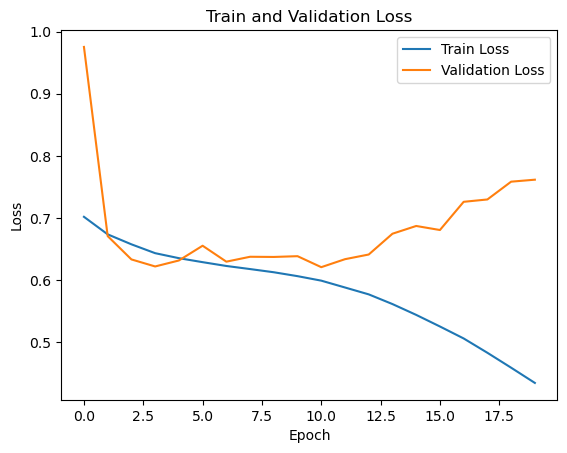

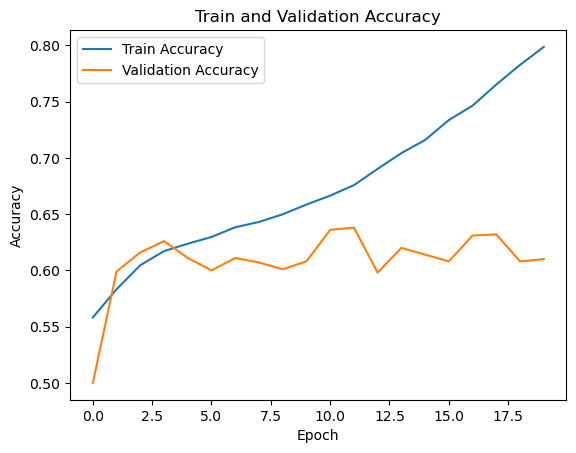

In [15]:
# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(f, l,
          batch_size=256,
          epochs=20, 
          verbose=1,
          validation_data=(f_test, l_test),
          callbacks=[early_stopping])

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()